In [ ]:
!pip install nltk
!pip install textblob
!pip install wordcloud
!pip install pandas-profiling

import pandas as pd
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import nltk
import matplotlib.pyplot as plt
import pandas_profiling as pp
import scipy.cluster.hierarchy as sch

from PIL import Image
from nltk.stem import WordNetLemmatizer  # Import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate, train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import accuracy_score, silhouette_score, cohen_kappa_score
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.cluster import KMeans,AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.manifold import TSNE

from yellowbrick.text import TSNEVisualizer

from textblob import Word, TextBlob
from wordcloud import WordCloud, STOPWORDS
from warnings import filterwarnings
from imblearn.over_sampling import SMOTE
from gensim.models import Word2Vec
from collections import Counter

nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("vader_lexicon")
nltk.download('punkt')

filterwarnings("ignore")
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 500)
pd.set_option("display.float_format", lambda x: '%.2f' % x)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.3/356.3 kB 31.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 12.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 40.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 26.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 39.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 87.8 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27079 sha256=3a381d696d05c49a8c44e692569608d27d2efda625a4d461fe19ab3b0dca12b3
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: wordcloud
    Found existing installation: wordcloud 1.8.2.2
    Uninstalling wordc

<ipython-input-1-1d8509a6a9f4>:13: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pp
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
data = pd.read_csv("train_data.csv")

#Data Exploration

##Profiling Report

In [ ]:
pp.ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
data.head()

name   brand                                         categories            primaryCategories              reviews.date                                       reviews.text             reviews.title sentiment
0  All-New Fire HD 8 Tablet, 8" HD Display, Wi-Fi...  Amazon  Electronics,iPad & Tablets,All Tablets,Fire Ta...                  Electronics  2016-12-26T00:00:00.000Z  Purchased on Black FridayPros - Great Price (e...           Powerful tablet  Positive
1        Amazon - Echo Plus w/ Built-In Hub - Silver  Amazon  Amazon Echo,Smart Home,Networking,Home & Tools...         Electronics,Hardware  2018-01-17T00:00:00.000Z  I purchased two Amazon in Echo Plus and two do...  Amazon Echo Plus AWESOME  Positive
2  Amazon Echo Show Alexa-enabled Bluetooth Speak...  Amazon  Amazon Echo,Virtual Assistant Speakers,Electro...         Electronics,Hardware  2017-12-20T00:00:00.000Z  Just an average Alexa option. Does show a few ...                   Average   Neutral
3  Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...  Amazon  eBook Readers,Fire Tablets,Electronics Feature...  Office Supplies,Electronics  2017-08-04T00:00:00.000Z  very good product. Exactly what I wanted, and ...               Greattttttt  Positive
4  Brand New Amazon Kindle Fire 16gb 7" Ips Displ...  Amazon  Computers/Tablets & Networking,Tablets & eBook...                  Electronics  2017-01-23T00:00:00.000Z  This is the 3rd one I've purchased. I've bough...             Very durable!  Positive

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   name               4000 non-null   object
 1   brand              4000 non-null   object
 2   categories         4000 non-null   object
 3   primaryCategories  4000 non-null   object
 4   reviews.date       4000 non-null   object
 5   reviews.text       4000 non-null   object
 6   reviews.title      3990 non-null   object
 7   sentiment          4000 non-null   object
dtypes: object(8)
memory usage: 250.1+ KB


In [ ]:
#counts unique values in each column dataset
data.nunique()

name                   23
brand                   1
categories             23
primaryCategories       4
reviews.date          638
reviews.text         3598
reviews.title        2606
sentiment               3
dtype: int64

In [ ]:
data.count()

name                 4000
brand                4000
categories           4000
primaryCategories    4000
reviews.date         4000
reviews.text         4000
reviews.title        3990
sentiment            4000
dtype: int64

In [ ]:
#imbalance
data["sentiment"].value_counts()

Positive    3749
Neutral      158
Negative      93
Name: sentiment, dtype: int64

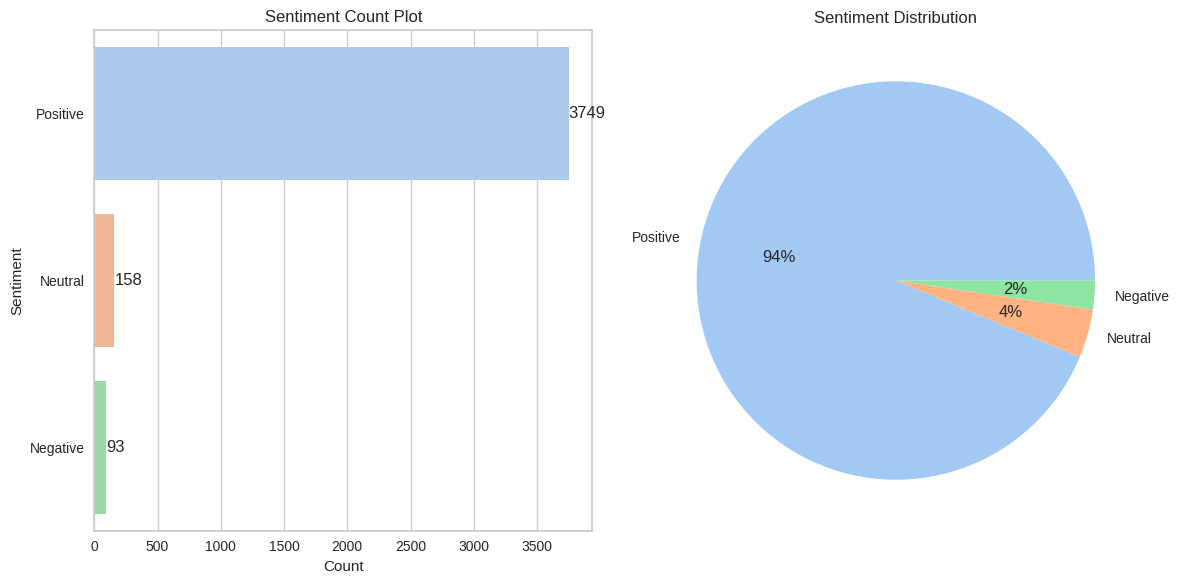

In [ ]:
# Calculate value counts for the 'sentiment' column
sns.set_palette("pastel")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

sns.countplot(y=data.sentiment, ax=ax1)
ax1.set_xlabel("Count")
ax1.set_ylabel("Sentiment")
ax1.set_title("Sentiment Count Plot")

for p in ax1.patches:
    count = int(p.get_width())  # Convert width (count) to integer
    ax1.annotate(f"{count}", (p.get_width(), p.get_y() + p.get_height() / 2), ha="left", va="center")

sentiment_counts = data["sentiment"].value_counts()

ax2.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.0f%%')
ax2.set_title("Sentiment Distribution")

plt.tight_layout()
plt.show()

Positive words


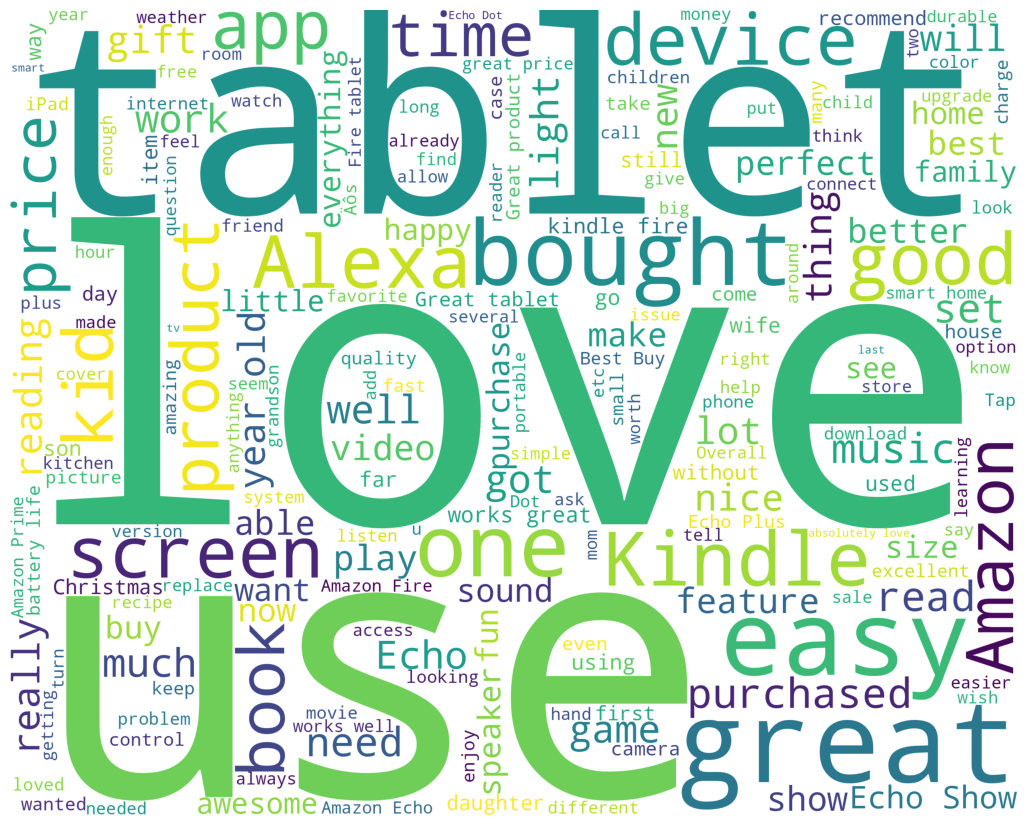

Negative words


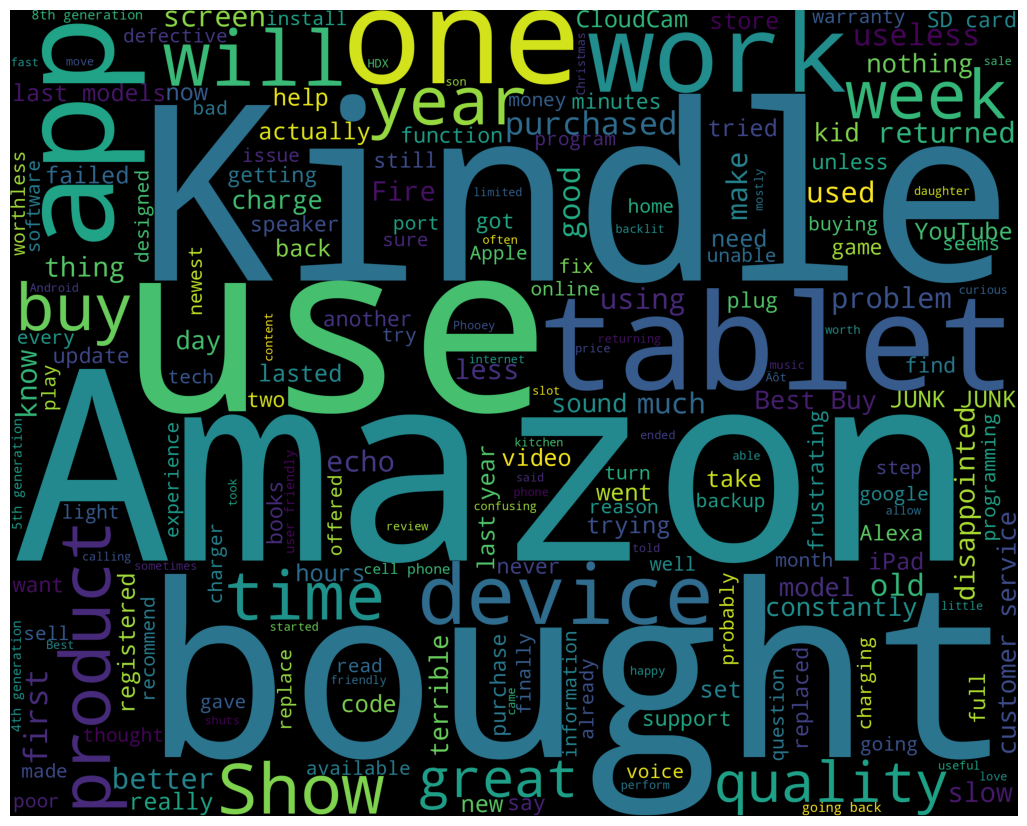

Neutral words


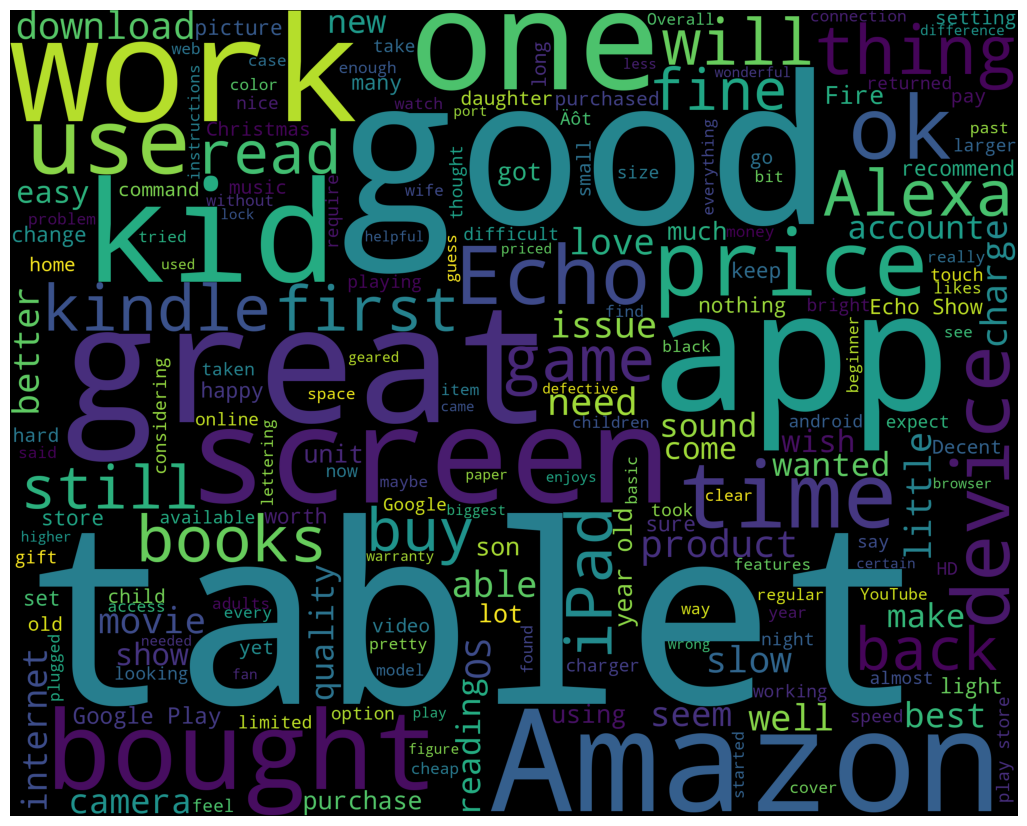

In [ ]:
data_pos = data[data['sentiment'] == 'Positive']
data_pos = data_pos['reviews.text']
data_neg = data[data['sentiment'] == 'Negative']
data_neg = data_neg['reviews.text']
data_neutral = data[data['sentiment'] == 'Neutral']
data_neutral = data_neutral['reviews.text']

def wordcloud_draw(data, color='black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                             if 'http' not in word
                             and not word.startswith('@')
                             and not word.startswith('#')
                             and word != 'RT'
                             ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color=color,
                          width=2500,
                          height=2000
                          ).generate(cleaned_word)
    plt.figure(1, figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

print("Positive words")
wordcloud_draw(data_pos, 'white')
print("Negative words")
wordcloud_draw(data_neg)
print("Neutral words")
wordcloud_draw(data_neutral)

## Data Cleaning

In [ ]:
# Check for missing values
missing_values = data.isnull().sum()
# Print the count of missing values for each column
print("Missing values per column:")
print(missing_values)

Missing values per column:
name                  0
brand                 0
categories            0
primaryCategories     0
reviews.date          0
reviews.text          0
reviews.title        10
sentiment             0
dtype: int64


In [ ]:
# Drop rows with missing values (NaN)
data = data.dropna()

In [ ]:
# Check for missing values
missing_values = data.isnull().sum()
# Print the count of missing values for each column
print("Missing values per column:")
print(missing_values)

Missing values per column:
name                 0
brand                0
categories           0
primaryCategories    0
reviews.date         0
reviews.text         0
reviews.title        0
sentiment            0
dtype: int64


In [ ]:
data.duplicated().sum()

58

In [ ]:
#There are 58 duplicates so we can drop the duplicate values
data = data.drop_duplicates().reset_index(drop=True)

In [ ]:
data.count()

name                 3932
brand                3932
categories           3932
primaryCategories    3932
reviews.date         3932
reviews.text         3932
reviews.title        3932
sentiment            3932
dtype: int64

In [ ]:
data.columns

Index(['name', 'brand', 'categories', 'primaryCategories', 'reviews.date', 'reviews.text', 'reviews.title', 'sentiment'], dtype='object')

In [ ]:
data.rename(columns = {'reviews.text':'reviews_text', 'reviews.title':'reviews_title','reviews.date':'reviews_date'}, inplace = True)

In [ ]:
data.columns

Index(['name', 'brand', 'categories', 'primaryCategories', 'reviews_date', 'reviews_text', 'reviews_title', 'sentiment'], dtype='object')

In [ ]:
# Drop the specified columns
columns_to_drop = ['name', 'brand', 'categories', 'primaryCategories', 'reviews_date']
data.drop(columns=columns_to_drop, inplace=True)

In [ ]:
def create_polarity_scores(dataframe, dependent_var):
  sia = SentimentIntensityAnalyzer()
  dataframe["polarity_score"] = dataframe[dependent_var].apply(lambda x: sia.polarity_scores(x)["compound"])

In [ ]:
create_polarity_scores(data, "reviews_text")

In [ ]:
data.head()

reviews_text             reviews_title sentiment  polarity_score
0  Purchased on Black FridayPros - Great Price (e...           Powerful tablet  Positive            0.97
1  I purchased two Amazon in Echo Plus and two do...  Amazon Echo Plus AWESOME  Positive            0.97
2  Just an average Alexa option. Does show a few ...                   Average   Neutral           -0.33
3  very good product. Exactly what I wanted, and ...               Greattttttt  Positive            0.75
4  This is the 3rd one I've purchased. I've bough...             Very durable!  Positive            0.18

In [ ]:
# First step - tokenizing phrases
def text_preprocessing(dataframe, dependent_var):
  # Normalizing Case Folding - Uppercase to Lowercase
  dataframe[dependent_var] = dataframe[dependent_var].apply(lambda x: " ".join(x.lower() for x in str(x).split()))

  # Removing Punctuation
  dataframe[dependent_var] = dataframe[dependent_var].str.replace('[^\w\s]','')

  # Removing Numbers
  dataframe[dependent_var] = dataframe[dependent_var].str.replace('\d','')

  # StopWords
  sw = stopwords.words('english')
  dataframe[dependent_var] = dataframe[dependent_var].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

  # Remove Rare Words
  temp_df = pd.Series(' '.join(dataframe[dependent_var]).split()).value_counts()
  drops = temp_df[temp_df <= 1]
  dataframe[dependent_var] = dataframe[dependent_var].apply(lambda x: " ".join(x for x in str(x).split() if x not in drops))

  # Lemmatize
  lemmatizer = WordNetLemmatizer()  # Create a lemmatizer object
  dataframe[dependent_var] = dataframe[dependent_var].apply(lambda x: " ".join([lemmatizer.lemmatize(word) for word in x.split()]))

  return dataframe

In [ ]:
data = text_preprocessing(data, "reviews_text")
data

reviews_text                           reviews_title sentiment  polarity_score
0     purchased black great price even powerful fast...                         Powerful tablet  Positive            0.97
1     purchased two amazon echo plus two dot plus fo...                Amazon Echo Plus AWESOME  Positive            0.97
2     average alexa option show thing screen still l...                                 Average   Neutral           -0.33
3                good product exactly wanted good price                             Greattttttt  Positive            0.75
4     rd one ive purchased ive bought one niece case...                           Very durable!  Positive            0.18
...                                                 ...                                     ...       ...             ...
3927             itäôs fun family play may get wear see                                 Fun toy  Positive           -0.03
3928  love kindle great product eye strain enjoy rea...                           Great Product  Positive            0.92
3929  looking speaker use phone didnt want worry thi...                    Great "dumb" speaker  Positive           -0.09
3930  second amazon fire tablet purchased time color...  A great 7 inch tablet at a great price  Positive            0.20
3931                    satisfied tablet fast efficient                       Gets the job done  Positive            0.73

[3932 rows x 4 columns]

In [ ]:
data["reviews_text"].head()

0    purchased black great price even powerful fast...
1    purchased two amazon echo plus two dot plus fo...
2    average alexa option show thing screen still l...
3               good product exactly wanted good price
4    rd one ive purchased ive bought one niece case...
Name: reviews_text, dtype: object

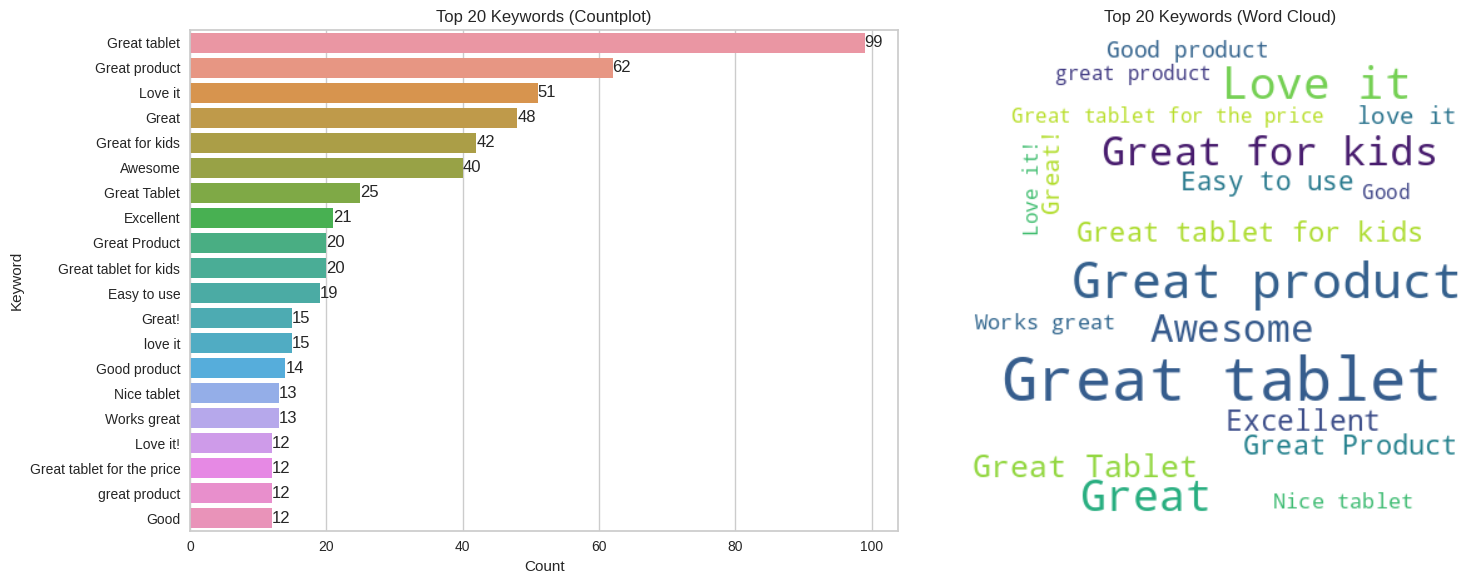

In [ ]:
# Get the most common keywords and their counts
top_keywords = data['reviews_title'].value_counts().iloc[:20]

sns.set_palette("pastel")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

sns.countplot(y=data.reviews_title, order=top_keywords.index, ax=ax1)
ax1.set_title('Top 20 Keywords (Countplot)')
ax1.set_xlabel('Count')
ax1.set_ylabel('Keyword')

# Add the count values to each bar
for i, v in enumerate(top_keywords):
    ax1.text(v, i, f"{v}", ha="left", va="center")

# Generate the word cloud for the most common keywords
wordcloud = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(top_keywords)

# Plot the word cloud on the second subplot (ax2)
ax2.imshow(wordcloud, interpolation='bilinear')
ax2.axis('off')
ax2.set_title('Top 20 Keywords (Word Cloud)')

# Adjust layout to prevent overlapping
plt.tight_layout()

plt.show()


# Input Feature & Target

In [ ]:
X = data[["reviews_title", "reviews_text"]]
y=data["sentiment"]

# Text Transformation

In [ ]:
def Words_Relations (T_df, T_Name):
    from yellowbrick.text import TSNEVisualizer
    tsne = TSNEVisualizer(title=" Words Relations in "+ T_Name+" transformatiom")
    tsne.fit(T_df,data["sentiment"])
    tsne.show()

## **(1) Bag of Words**

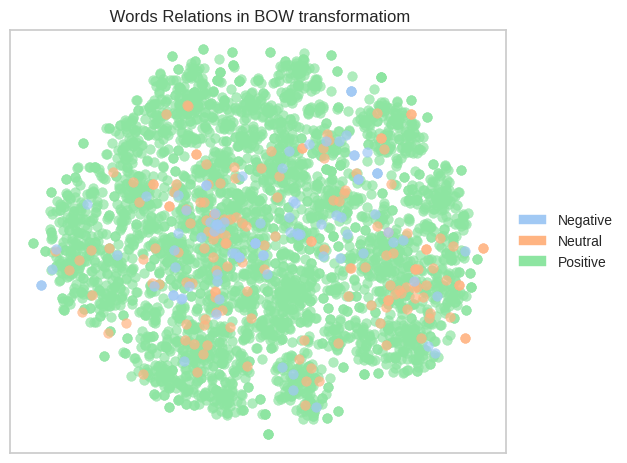

In [ ]:
#BOW
count_vectorizer = CountVectorizer()
BOW_vectors = count_vectorizer.fit_transform(X["reviews_text"])
feature_names = count_vectorizer.get_feature_names_out()

# Convert the BOW vectors to a dataframe
X_BOW = pd.DataFrame(BOW_vectors.toarray(), columns=feature_names)

#Draw Chart showing word Relations
#print(X_BOW)
Words_Relations (X_BOW ,"BOW")


## **(2) TF-IDF**


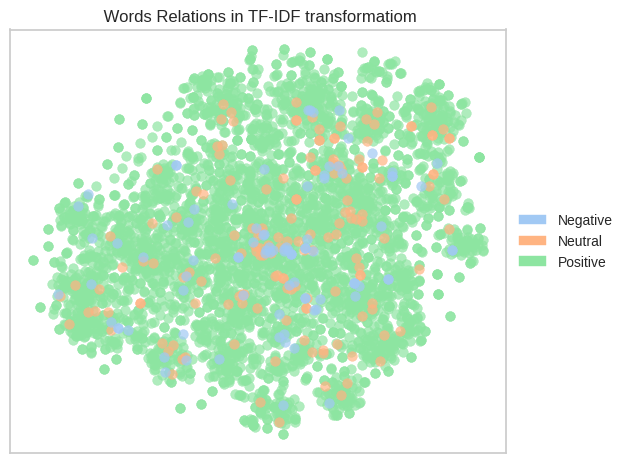

In [ ]:
#TF
# Create the TF-IDF vectors
TFidf_vect = TfidfVectorizer()
TFidf_vectors = TFidf_vect.fit_transform(X["reviews_text"])

 # Convert the TF-IDF vectors to a dataframe#
 # Split the TF dataset into input features X and output labels y
X_TF = pd.DataFrame(TFidf_vectors.toarray(), columns=TFidf_vect.get_feature_names_out())

#Draw Chart showing word Relations
#print(X_TF)
Words_Relations (X_TF ,"TF-IDF")

## **(3)LDA**

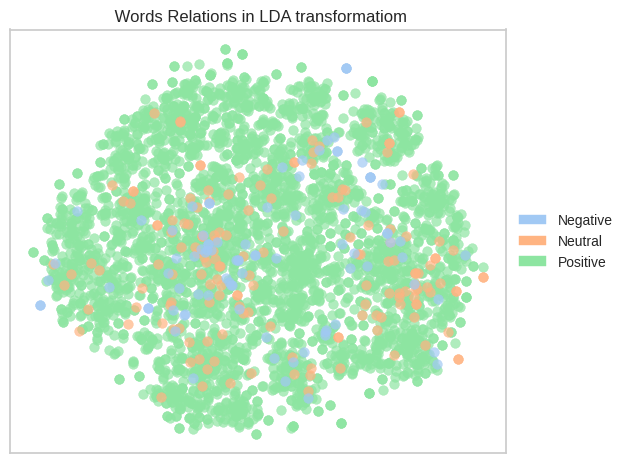

In [ ]:
##LDA

# Initialize the CountVectorizer
count_vectorizer = CountVectorizer()

# Fit and transform the text data
LDA_vectors = count_vectorizer.fit_transform(X["reviews_text"])

# Get the feature names
feature_names = count_vectorizer.get_feature_names_out()


# Initialize the LDA model
lda_model = LatentDirichletAllocation(n_components=10)  # Specify the number of topics

# Fit the LDA model to the data
lda_model.fit(LDA_vectors)

# Convert the BOW vectors to a dataframe
X_LDA = pd.DataFrame(LDA_vectors.toarray(), columns=feature_names)

# Draw chart showing word relations
"""
def words_relations(lda_model, feature_names):
    for idx, topic in enumerate(lda_model.components_):
        print(f"Topic #{idx}")
        print(", ".join([feature_names[i] for i in topic.argsort()[:-11:-1]]))
        print()

words_relations(lda_model, feature_names)
"""
#print(X_LDA)
Words_Relations (X_LDA ,"LDA")

# Encoding

In [ ]:
# Create a mapping dictionary for sentiment labels
sentiment_mapping = {
    'Positive': 1,
    'Negative': -1,
    'Neutral': 0
}

# Apply mapping to the 'sentiment' column in the original 'data' DataFrame
y = data["sentiment"].map(sentiment_mapping)

#Over Sampling

In [ ]:
def sampling (X,y):
  # Apply SMOTE to oversample the minority class in the training data
  oversampler = SMOTE(sampling_strategy='auto', random_state=42)
  X_resampled, y_resampled = oversampler.fit_resample(X, y)

  return X_resampled,y_resampled

#Classification

In [ ]:
ML_models_acc = {"Support Vector Machine SVM":set() ,"Random Forest":set(),"Gaussian Naive Bayes":set(),"Logistic Regression":set(),"K-Means": set(),"Hierarchical": set()}

In [ ]:
def predict_count(train_x, model, new_comment):
  new_comment= pd.Series(new_comment)
  new_comment = CountVectorizer().fit(X).transform(new_comment)
  result = model.predict(new_comment)
  if result==1:
    print("Comment is Pozitive")
  elif result==-1:
    print("Comment is Negative")
  else:
    print("Comment is Nutrall")

In [ ]:
def C_ML_Models(df ,TF_name):

    df,y=sampling(df,data["sentiment"])

    # Split the data into train and test sets
    x_train, x_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)


    # Classifiers: Support Vector Machine, Rand om Forest, Gaussian Naive Bayes, Bernoulli Naive Bayes,
    # K Nearest Neighbors, XGB Extreme X Gradient Boosting, Stochastic Gradient Descent SGD,
    # Logistic Regression, Decision Tree Classifier, AdaBoost, CatBoost
    classifiers = {
       "Support Vector Machine SVM": SVC(C=100, gamma=0.002),
       "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
        "Gaussian Naive Bayes": GaussianNB(),
        "Logistic Regression": LogisticRegression(),

    }


    model_results = {}
    y_pred = {}

    for clf_name, clf in classifiers.items():

        #obtain predictions
        clf_fit=clf.fit(x_train ,y_train)
        y_pred = clf.predict(x_test)
        test_accuracy = clf.score(x_test, y_test)*100.0

        #Storing the test accuracy
        model_results[clf_name]=test_accuracy

        # # # test each model giving examples from our data
        # predict_count(x_train, model=clf_fit, new_comment="Purchased on Black FridayPros - Great Price (even off sale)Very powerful and fast with quad core processors Amazing soundWell builtCons -Amazon ads, Amazon need this to subsidize the tablet and will remove the adds if you pay them $15.Inability to access other apps except the ones from Amazon. There is a way which I was able to accomplish to add the Google Play storeNet this is a great tablet for the money")
        # predict_count(x_train, model=clf_fit, new_comment="was cheap, can not run chrome stuff, returned to store.")
        # predict_count(x_train, model=clf_fit, new_comment="Not as good as before the old kindle, just seams to work better")
        #print()
        #print("#################################################################################################################")

        ML_models_acc [clf_name].add((TF_name, model_results[clf_name]))


    #Sorted Table displaying the Accuracy Scores for Different Models
    sorted_Acc = sorted(model_results.items(), key=lambda x: x[1], reverse=True)
    C_df = pd.DataFrame(sorted_Acc, columns=['Model', 'Accuracy_Score'])
    styled_table=C_df.style.background_gradient(cmap='Blues')
    display(styled_table)

    #Accuracy Scores for Different Models
    # Define a list of specific pastel colors
    pastel_colors = ['lightblue', 'lightgreen', 'lightpink', 'lightcoral']

    plt.figure(figsize=(7, 4))
    plt.bar(C_df['Model'], C_df['Accuracy_Score'], color=pastel_colors)
    bar_width = 0.2
    plt.xlabel('Model')
    plt.ylabel('Accuracy Score')
    plt.title('Accuracy Scores for Different Models', fontsize=10)
    plt.xticks(rotation=90)
    plt.show()

    best_classifier = max(model_results, key=model_results.get)
    best_clf =model_results[best_classifier]
    return C_df,best_classifier,best_clf

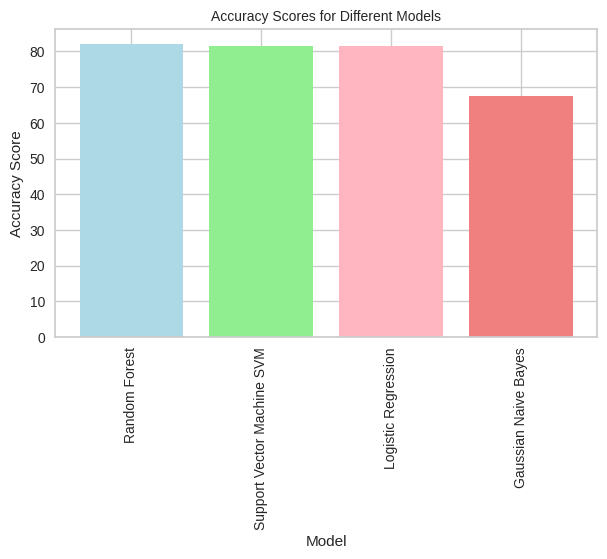

In [ ]:
BOW_df,BOW_champion_model,BOW_champion_accuaracy=C_ML_Models(X_BOW,'BOW')
print('\n')

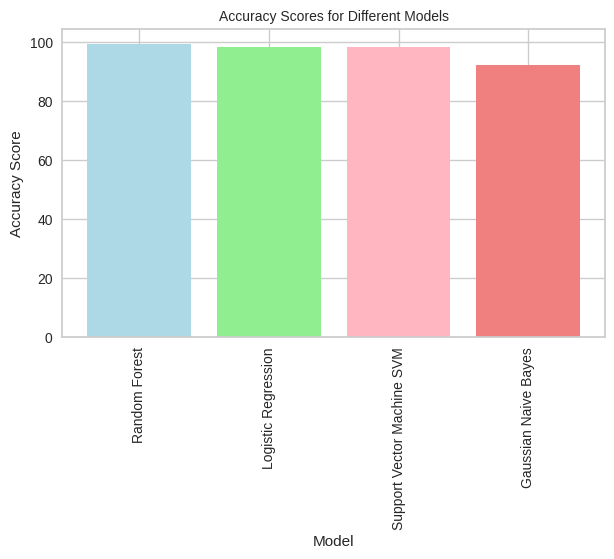

In [ ]:
TF_df,TF_champion_model,TF_champion_accuaracy=C_ML_Models(X_TF ,'TF')
print('\n')

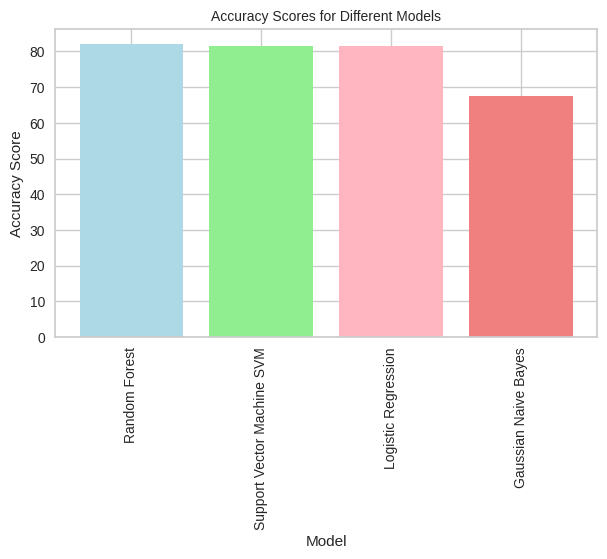

In [ ]:
LDA_df,LDA_champion_model,LDA_grams_champion_accuaracy=C_ML_Models(X_LDA ,'LDA')
print('\n')

#Clustering

In [ ]:
Silhouette = {'K-Means': set(), 'EM': set(), 'Hierarchical': set()}

In [ ]:
#Dim reduction and Kmean Model
def C_ML_Models(T_df,n,TF_name):

  algorithm = KMeans(n_clusters=n, random_state=42)

  algorithm.fit_predict(T_df)
  model_labels = algorithm.predict(T_df)
  sil_avg = silhouette_score(T_df, model_labels)*100.0

  ML_models_acc ["K-Means"].add((TF_name, sil_avg))

  print(f"\nSilhouette Score (K-Means): {sil_avg}\n")

  return sil_avg

# (1) K-Means

KMean With BOW

In [ ]:
KMeans_Silhouette_BOW= C_ML_Models(X_BOW,3,'BOW')

Silhouette['K-Means'].add(('BOW', KMeans_Silhouette_BOW))


Silhouette Score (K-Means): 81.55401438608376



KMean With TF

In [ ]:
KMeans_Silhouette_TF=C_ML_Models(X_TF,3,'TF')

Silhouette['K-Means'].add(('TF', KMeans_Silhouette_TF))


Silhouette Score (K-Means): 0.7683612431807604



KMean With LDA

In [ ]:
KMeans_Silhouette_LDA =C_ML_Models(X_LDA,3,'LDA')

Silhouette['K-Means'].add(('LDA', KMeans_Silhouette_LDA))


Silhouette Score (K-Means): 81.55401438608376



## **(3) Hierarchical clustering (Agglomerative)**

In [ ]:
def perform_hierarchical_clustering(X):

    dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
    hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
    y_hc = hc.fit_predict(X)
    return y_hc

def H_MODEL(x_x,n,TF_name):
  hX_embedded = TSNE(n_components=n, learning_rate='auto',
                 init='random', perplexity=40).fit_transform(x_x)
  km_cls=AgglomerativeClustering(n_clusters=n, affinity = 'euclidean')

  hi_labels=km_cls.fit_predict(hX_embedded)
  hsil_avg = silhouette_score(hX_embedded, hi_labels)*100.0


  ML_models_acc ["Hierarchical"].add((TF_name,hsil_avg))

  print(f"\nSilhouette Score (Hierarchical) : {hsil_avg }\n")

  return  hsil_avg

Hierarchical clustering With BOW

In [ ]:
H_Silhouette_BOW=H_MODEL(X_BOW,3,'BOW')
Silhouette['Hierarchical'].add(('BOW', H_Silhouette_BOW))


Silhouette Score (Hierarchical) : 17.925024032592773



Hierarchical clustering With TF

In [ ]:
H_Silhouette_TF=H_MODEL(X_TF,3,'TF')
Silhouette['Hierarchical'].add(('TF', H_Silhouette_TF))


Silhouette Score (Hierarchical) : 17.966507375240326



Hierarchical clustering With LDA

In [ ]:
H_Silhouette_LDA=H_MODEL(X_LDA,3,'LDA')
Silhouette['Hierarchical'].add(('LDA', H_Silhouette_LDA))

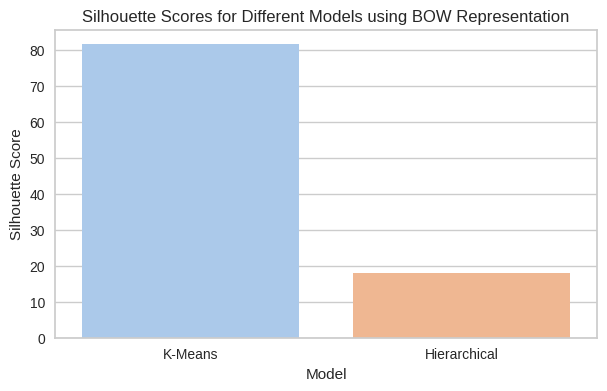

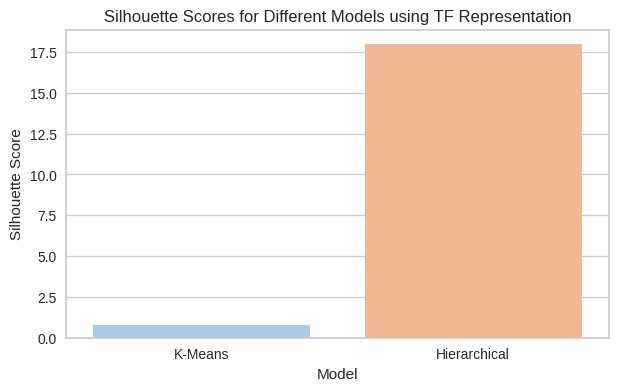

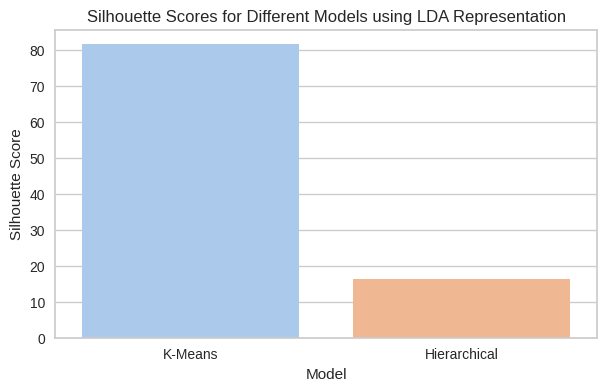

In [ ]:
# Define custom pastel colors
pastel_colors = sns.color_palette("pastel")

# Silhouette scores for 'BOW' representation
silhouette_bow = {
    'K-Means': KMeans_Silhouette_BOW,
    'Hierarchical': H_Silhouette_BOW
}

# Silhouette scores for 'TF' representation
silhouette_tf = {
    'K-Means': KMeans_Silhouette_TF,
    'Hierarchical': H_Silhouette_TF
}

# Silhouette scores for 'LDA' representation
silhouette_lda = {
    'K-Means': KMeans_Silhouette_LDA,
    'Hierarchical': H_Silhouette_LDA
}

# Function to create a bar chart with pastel colors
def plot_bar_chart_pastel(data, representation):
    models = list(data.keys())
    scores = list(data.values())

    plt.figure(figsize=(7, 4))
    sns.barplot(x=models, y=scores, palette=pastel_colors)
    plt.xlabel('Model')
    plt.ylabel('Silhouette Score')
    plt.title(f'Silhouette Scores for Different Models using {representation} Representation')
    plt.show()

# Plot bar chart with pastel colors for 'BOW' representation
plot_bar_chart_pastel(silhouette_bow, 'BOW')

# Plot bar chart with pastel colors for 'TF' representation
plot_bar_chart_pastel(silhouette_tf, 'TF')

# Plot bar chart with pastel colors for 'LDA' representation
plot_bar_chart_pastel(silhouette_lda, 'LDA')


In [ ]:
# Initialize empty lists to store the data
models_dataframe = []


# Iterate over the ML_models_acc dictionary and append data to the lists
for model, transformations in ML_models_acc.items():
    for transformation, score in transformations:
        models_dataframe.append({'Model': model, 'Transformation': transformation, 'Score': score})



# Create dataframes from the lists
ML_models_acc_df = pd.DataFrame(models_dataframe)


# Sort dataframes by "Score" column in descending order
models_acc_df = ML_models_acc_df.sort_values(by='Score', ascending=False)

In [ ]:
# Reset the index of the dataframes
models_acc_df = models_acc_df.reset_index(drop=True)

In [ ]:
# Print ML_models_acc dataframe
print("ML Models DataFrame:")
models_acc_df.style.background_gradient(cmap='Blues')

ML Models DataFrame:


In [ ]:
# Display the first element of the champion model dataframe
print("Champion Model  (First Element):")
champion_df_first = models_acc_df.iloc[0].to_frame()
display(champion_df_first)

Champion Model  (First Element):


0
Model           Random Forest
Transformation             TF
Score                   99.37

In [ ]:
# Define pastel color palette
pastel_colors = sns.color_palette('pastel')

# Define the models dictionary with their respective pastel colors
models = {
    'Support Vector Machine SVM': [pastel_colors[0]],
    'Random Forest': [pastel_colors[1]],
    'Gaussian Naive Bayes': [pastel_colors[2]],
    'Logistic Regression': [pastel_colors[3]],
    'K-Means': [pastel_colors[4]],
    'Hierarchical': [pastel_colors[5]]
}

# Function to plot scores for a specific model
def plot_scores(model_name, df):
    model_df = df[df['Model'] == model_name]
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Transformation', y='Score', data=model_df, palette=models[model_name])
    plt.xlabel('Transformation')
    plt.ylabel('Score')
    plt.title(f'{model_name} Scores for each Transformation')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


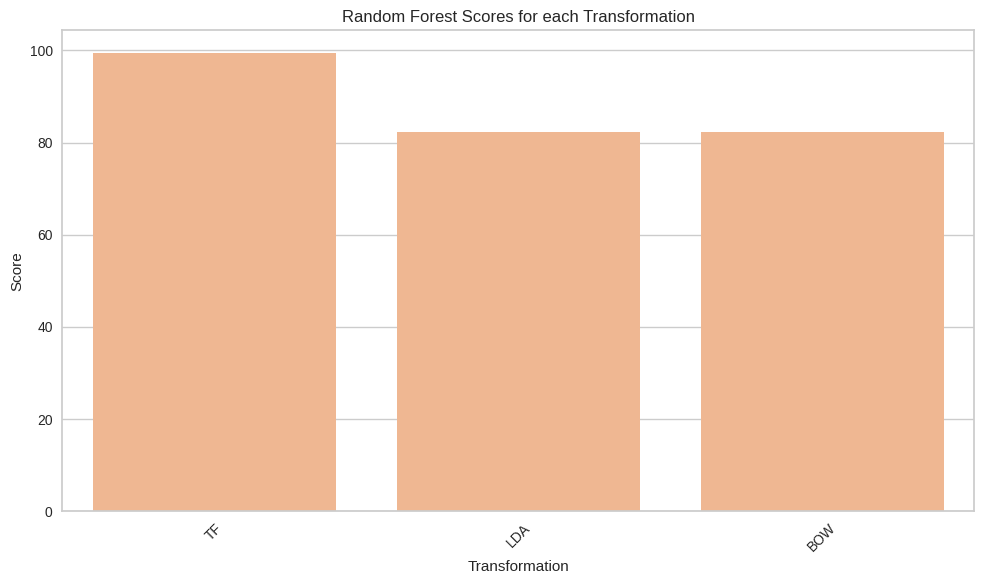

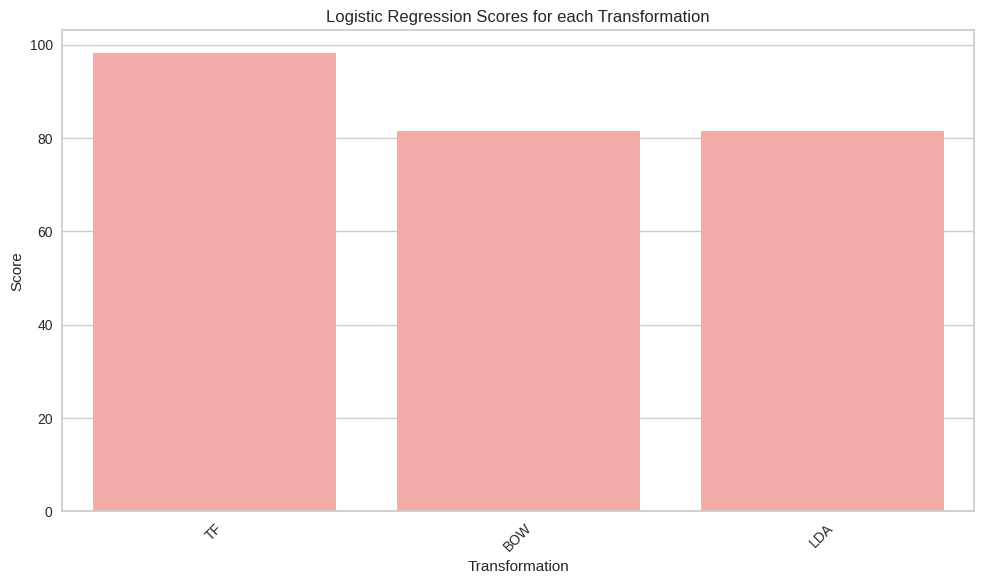

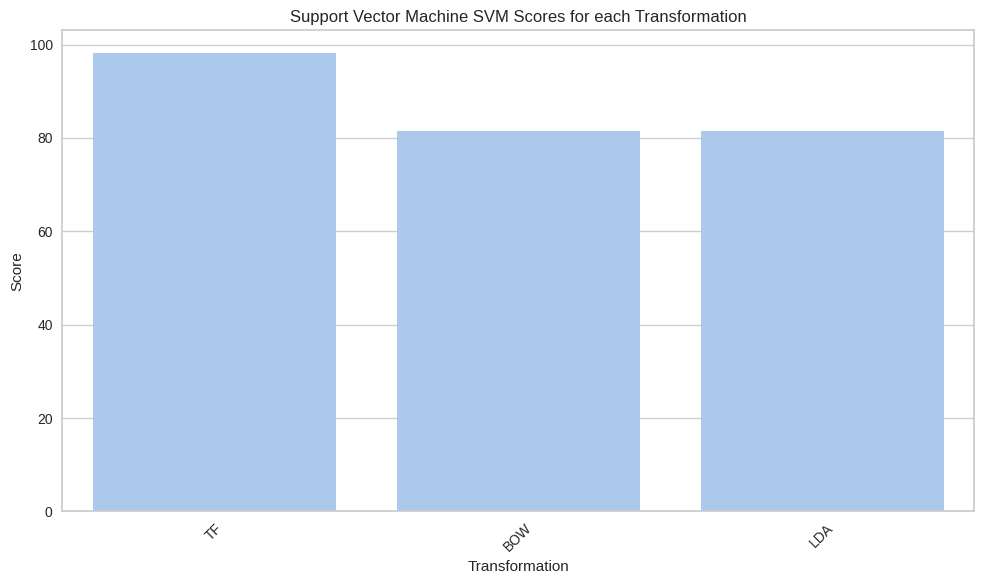

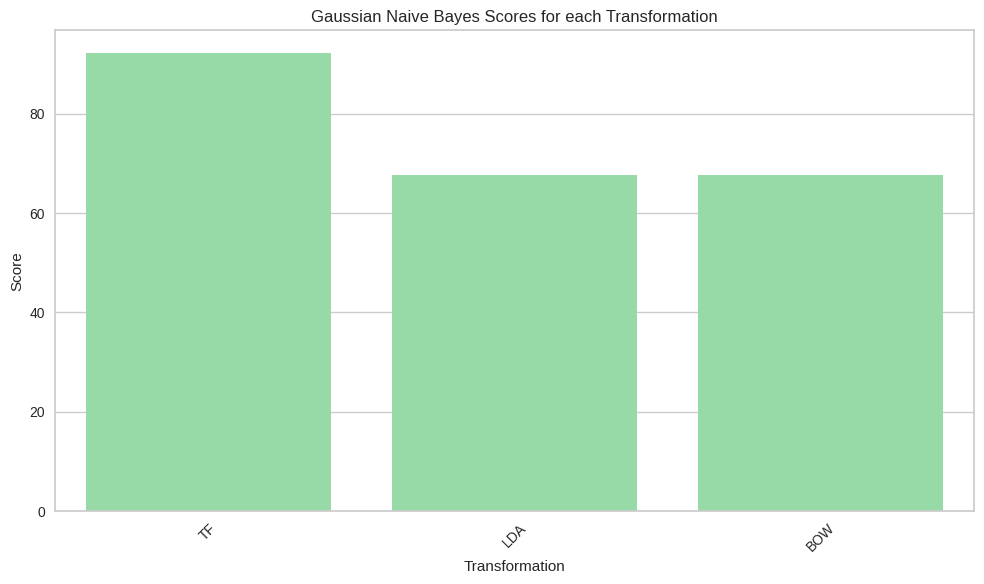

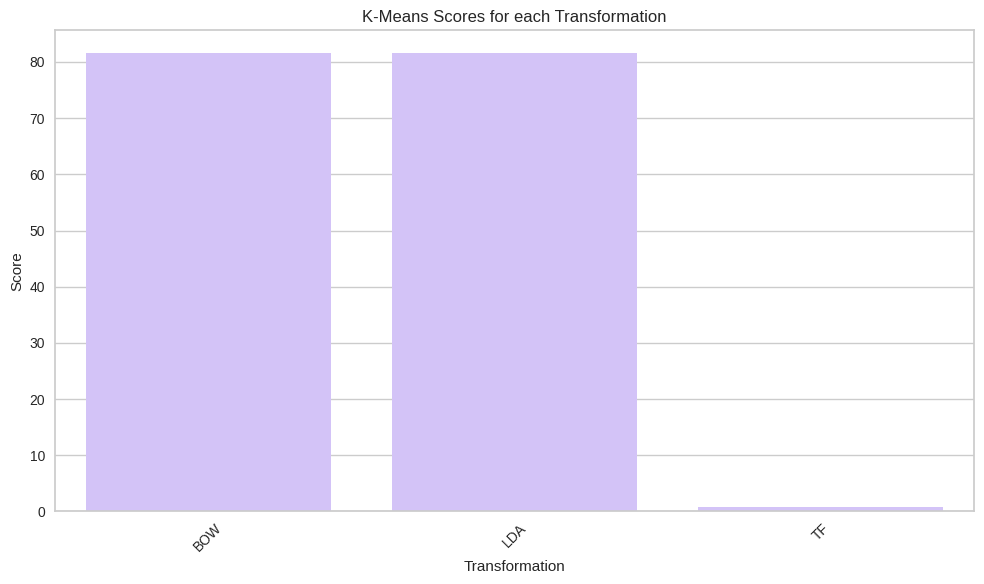

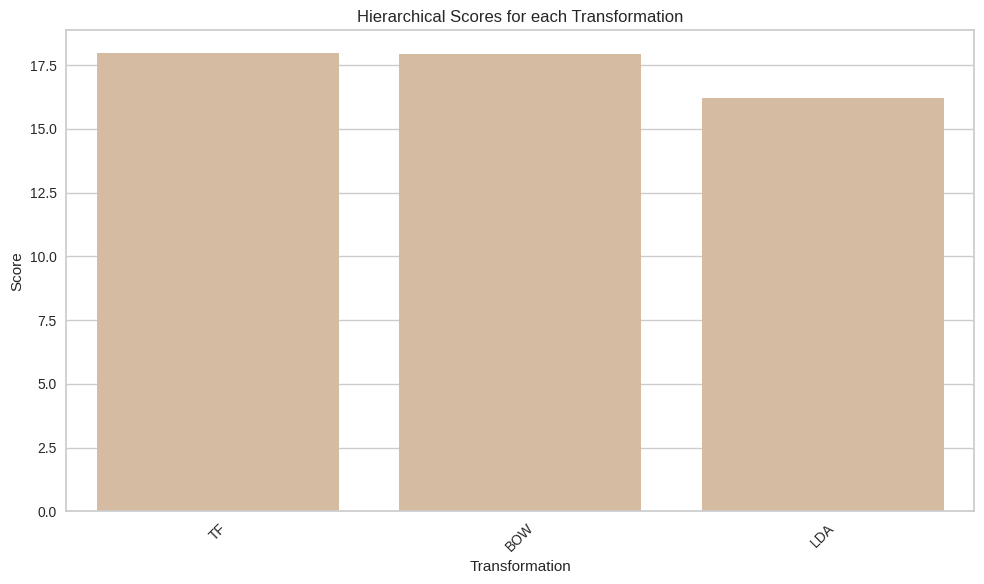

In [ ]:
# Plot Silhouette scores for each model
for model in models_acc_df['Model'].unique():
    plot_scores(model, models_acc_df)

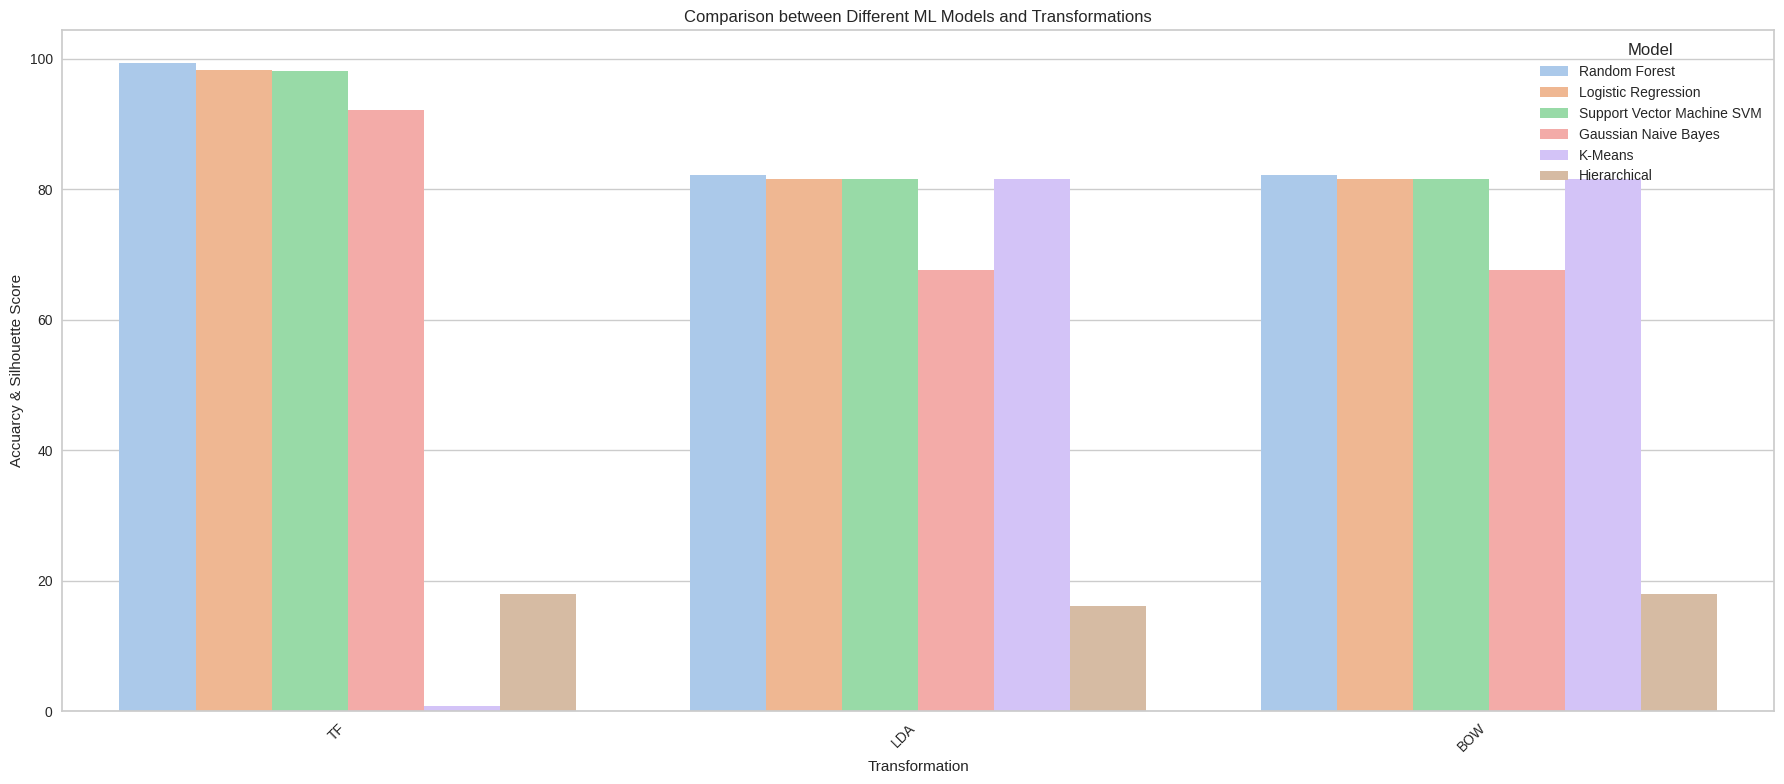

In [ ]:
# Define pastel color palette
pastel_colors = sns.color_palette('pastel')

# Create a bar plot with the custom color palette
plt.figure(figsize=(18, 8))
sns.barplot(x='Transformation', y='Score', hue='Model', data=models_acc_df, palette=pastel_colors)
plt.xlabel('Transformation')
plt.ylabel('Accuarcy & Silhouette Score')
plt.title('Comparison between Different ML Models and Transformations')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
